# Analisis Morfologico

## Importaciones

In [16]:
import sys
import os
import ast
from pathlib import Path
sys.path.append(os.path.abspath(".."))
from src.data import carga_pos_spacy
from src.analysis import (
    calcular_metricas_spacy,
    resumen_global
)

import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.ticker as mticker
import seaborn as sns
import numpy as np

## Carga de datos

In [2]:
df_spacy = carga_pos_spacy()
df_spacy['pos_tags_spacy'] = df_spacy['pos_tags_spacy'].apply(ast.literal_eval)
df_spacy.head()


Dataset cargado correctamente


,Song,Song year,Artist,Genre,Lyrics,tokens,pos_tags_spacy
0,craftsmanship,2005,buck-65,Hip-Hop,Most folks spend their days daydreaming of fin...,"['Most', 'folks', 'spend', 'their', 'days', 'd...","[(Most, ADJ, JJS, Most), (folks, NOUN, NNS, fo..."
1,come-on-out,2012,the-elwins,Indie,Take your cold hands and put them on my face S...,"['Take', 'your', 'cold', 'hands', 'and', 'put'...","[(Take, VERB, VB, take), (your, PRON, PRP$, yo..."
2,riot,2013,bullet-for-my-valentine,Metal,Are you ready its time for war Well break down...,"['Are', 'you', 'ready', 'its', 'time', 'for', ...","[(Are, AUX, VBP, be), (you, PRON, PRP, you), (..."
3,that-s-what-girls-do,2007,dream-street,Pop,You ask me why I change the color of my hair Y...,"['You', 'ask', 'me', 'why', 'I', 'change', 'th...","[(You, PRON, PRP, you), (ask, VERB, VBP, ask),..."
4,believe-in-a-dollar,2012,cassidy,Hip-Hop,Do you believe in magic in a young girls heart...,"['Do', 'you', 'believe', 'in', 'magic', 'in', ...","[(Do, AUX, VBP, do), (you, PRON, PRP, you), (b..."


## Cálculo de métricas

In [4]:
df_metricas = calcular_metricas_spacy(df_spacy)
print("Métricas calculadas correctamente")
df_metricas.head()


✔ metricas_spacy.csv guardado (7935 canciones)
Métricas calculadas correctamente


,Song,Artist,Genre,Song_year,total_tokens,vocab_unico,n_sustantivos,n_verbos,n_adjetivos,n_adverbios,...,n_auxiliares,n_interjecciones,n_numerales,densidad_lexica,ttr,ratio_sust_verb,ratio_adj_sust,ratio_adv_verb,ratio_pron_sust,ratio_func_cont
0,craftsmanship,buck-65,Hip-Hop,2005,427,199,83,101,32,20,...,31,1,1,0.4801,0.4660,0.8218,0.3855,0.1980,0.8072,0.8293
1,come-on-out,the-elwins,Indie,2012,293,108,45,86,16,11,...,20,0,0,0.4710,0.3686,0.5233,0.3556,0.1279,1.4222,0.8913
2,riot,bullet-for-my-valentine,Metal,2013,204,63,45,48,5,10,...,8,29,1,0.4902,0.3088,0.9375,0.1111,0.2083,0.4889,0.6100
3,that-s-what-girls-do,dream-street,Pop,2007,229,77,27,57,14,6,...,10,18,2,0.4105,0.3362,0.4737,0.5185,0.1053,2.3333,1.0213
4,believe-in-a-dollar,cassidy,Hip-Hop,2012,249,102,55,55,10,13,...,18,4,0,0.4618,0.4096,1.0000,0.1818,0.2364,0.7273,0.9217


## Métricas globales

In [5]:
df_tot=resumen_global(df_metricas)


=== MÉTRICAS GLOBALES (estadísticas por canción) ===

=== TOTALES DEL CORPUS ===
                  total_corpus  promedio_por_cancion
total_tokens           2006990                252.93
vocab_unico             791542                 99.75
n_sustantivos           415043                 52.31
n_verbos                469614                 59.18
n_adjetivos              98730                 12.44
n_adverbios             110152                 13.88
n_pronombres            375505                 47.32
n_propios                93316                 11.76
n_auxiliares            124520                 15.69
n_interjecciones         30969                  3.90
n_numerales               8850                  1.12


## Distribución Global de Categorías Gramaticales en el Corpus

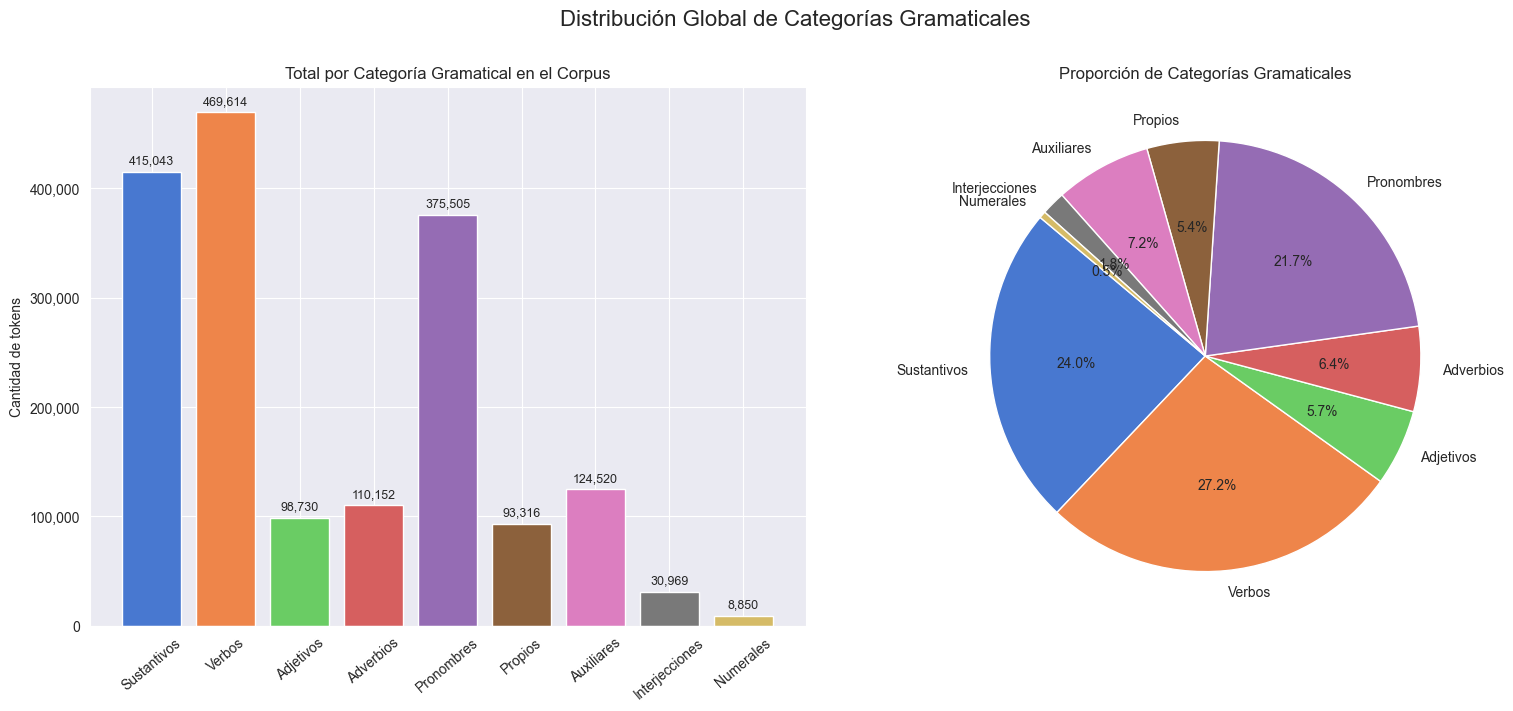


Insight: Los VERBOS (469,614) superan a los SUSTANTIVOS (415,043), lo que sugiere que las letras musicales son dinámicas y orientadas a la acción.
Los PRONOMBRES (375,505) son la 3ª categoría más frecuente, reflejo del estilo personal/narrativo de las canciones.


In [17]:
cats = ['n_sustantivos','n_verbos','n_adjetivos','n_adverbios',
        'n_pronombres','n_propios','n_auxiliares','n_interjecciones','n_numerales']
labels = ['Sustantivos','Verbos','Adjetivos','Adverbios',
          'Pronombres','Propios','Auxiliares','Interjecciones','Numerales']

valores = df_tot.loc[cats, 'total_corpus']

fig, axes = plt.subplots(1, 2, figsize=(16, 7))

# Barras
bars = axes[0].bar(labels, valores.values, color=sns.color_palette('muted', len(cats)))
axes[0].set_title('Total por Categoría Gramatical en el Corpus')
axes[0].set_ylabel('Cantidad de tokens')
axes[0].tick_params(axis='x', rotation=40)
axes[0].yaxis.set_major_formatter(mticker.FuncFormatter(lambda x, _: f'{int(x):,}'))
for bar in bars:
    axes[0].text(bar.get_x() + bar.get_width()/2, bar.get_height() + 5000,
                 f'{int(bar.get_height()):,}', ha='center', va='bottom', fontsize=9)

# Pie
axes[1].pie(valores.values, labels=labels, autopct='%1.1f%%',
            colors=sns.color_palette('muted', len(cats)), startangle=140)
axes[1].set_title('Proporción de Categorías Gramaticales')

plt.suptitle('Distribución Global de Categorías Gramaticales', fontsize=16, y=1.01)
plt.tight_layout()
plt.show()

## Densidad Léxica por Género Musical

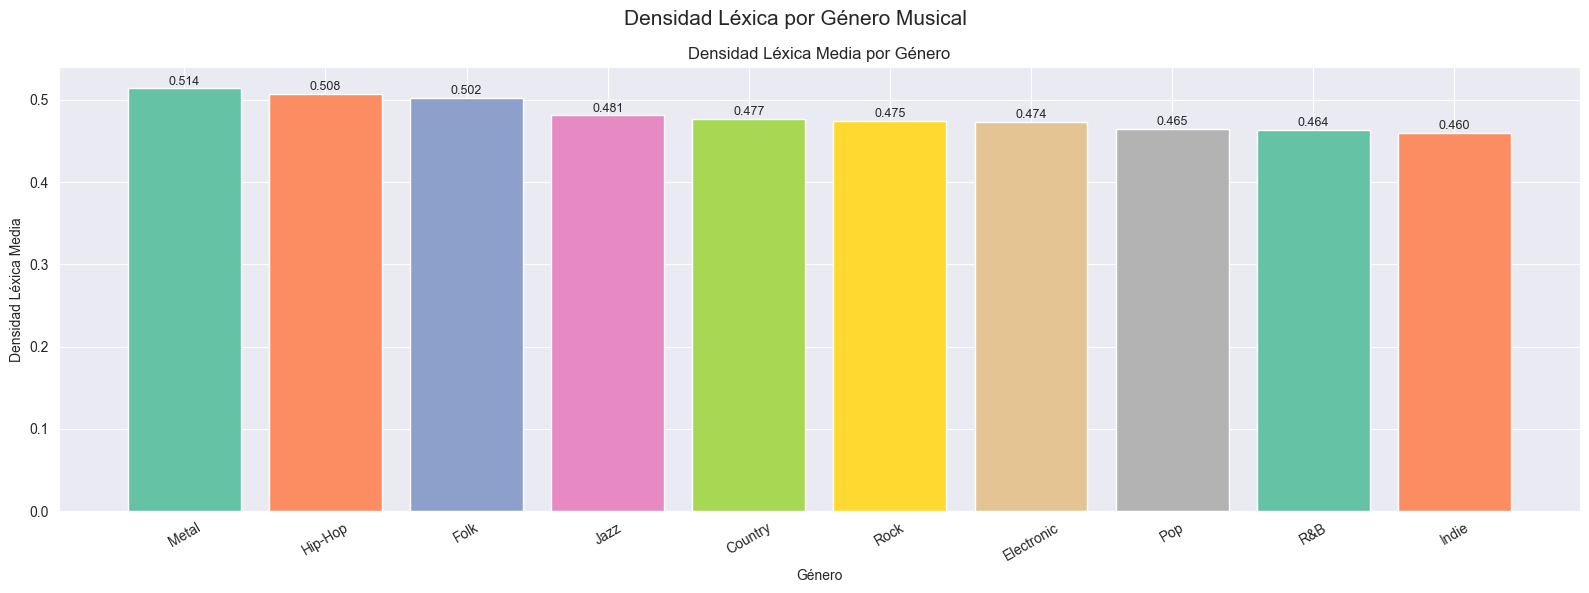

Género con mayor densidad léxica media: Metal (0.514)
Género con menor densidad léxica media: Indie (0.460)

Insight: Mayor densidad léxica → más palabras de contenido relativas al total.


In [23]:
fig, ax = plt.subplots(figsize=(16, 6))

# Medias
medias = df_metricas.groupby('Genre')['densidad_lexica'].mean().sort_values(ascending=False)

bars = ax.bar(
    medias.index,
    medias.values,
    color=sns.color_palette('Set2', len(medias))
)

ax.set_title('Densidad Léxica Media por Género')
ax.set_xlabel('Género')
ax.set_ylabel('Densidad Léxica Media')
ax.tick_params(axis='x', rotation=30)

for bar in bars:
    ax.text(
        bar.get_x() + bar.get_width()/2,
        bar.get_height() + 0.001,
        f'{bar.get_height():.3f}',
        ha='center',
        va='bottom',
        fontsize=9
    )

plt.suptitle('Densidad Léxica por Género Musical', fontsize=15)
plt.tight_layout()
plt.show()

print(f'Género con mayor densidad léxica media: {medias.idxmax()} ({medias.max():.3f})')
print(f'Género con menor densidad léxica media: {medias.idxmin()} ({medias.min():.3f})')


## Distribución de Total de Tokens por Género (Longitud de Canciones)

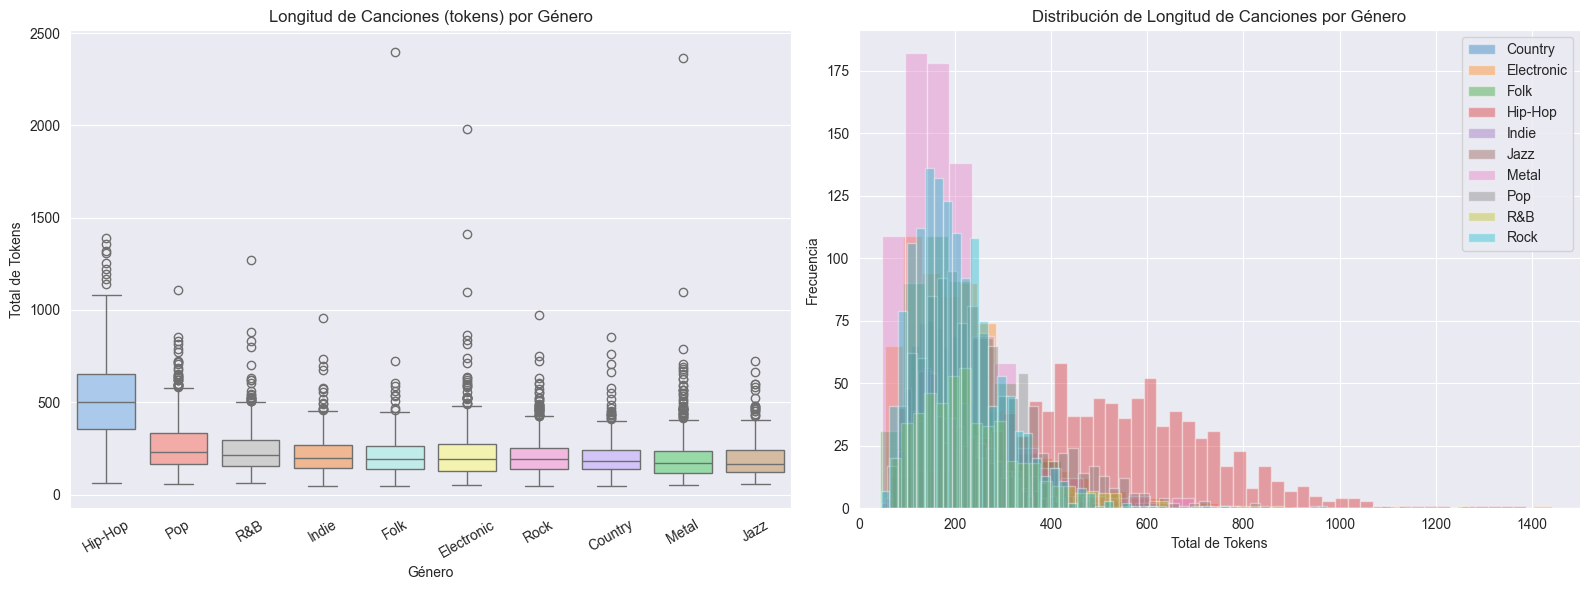

Estadísticas de longitud por género:
             mean  median    std
Genre                           
Hip-Hop     508.8   500.5  221.8
Pop         260.7   232.0  132.6
R&B         243.8   215.5  130.4
Electronic  224.7   194.0  151.4
Indie       216.3   197.0  108.4
Folk        214.8   194.0  138.7
Rock        206.1   190.0   94.6
Country     201.1   183.5   89.4
Metal       197.4   170.0  135.4
Jazz        191.8   167.5   94.2


In [29]:
fig, axes = plt.subplots(1, 2, figsize=(16, 6))

sns.boxplot(
    data=df_metricas,
    x='Genre',
    y='total_tokens',
    order=df_metricas.groupby('Genre')['total_tokens']
          .median()
          .sort_values(ascending=False)
          .index,
    hue='Genre',
    palette='pastel',
    legend=False,
    ax=axes[0]
)

axes[0].set_title('Longitud de Canciones (tokens) por Género')
axes[0].set_xlabel('Género')
axes[0].set_ylabel('Total de Tokens')
axes[0].tick_params(axis='x', rotation=30)

# Histograma general
for genre, grp in df_metricas.groupby('Genre'):
    axes[1].hist(grp['total_tokens'], bins=50, alpha=0.4, label=genre)

axes[1].set_title('Distribución de Longitud de Canciones por Género')
axes[1].set_xlabel('Total de Tokens')
axes[1].set_ylabel('Frecuencia')
axes[1].set_xlim(0, 1500)
axes[1].legend()

plt.tight_layout()
plt.show()

stats_len = df_metricas.groupby('Genre')['total_tokens'] \
    .agg(['mean', 'median', 'std']) \
    .round(1) \
    .sort_values('mean', ascending=False)

print('Estadísticas de longitud por género:')
print(stats_len.to_string())